In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
%pip install objaverse trimesh matplotlib

  Using cached objaverse-0.1.7-py3-none-any.whl.metadata (4.6 kB)
  Using cached trimesh-4.9.0-py3-none-any.whl.metadata (18 kB)
  Using cached matplotlib-3.10.7-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached loguru-0.7.3-py3-none-any.whl.metadata (22 kB)
  Using cached GPUtil-1.4.0.tar.gz (5.5 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp310-cp310-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using

In [2]:
import os
import json
import shutil
import random
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import objaverse

## Retrieve models for testing
we will load a subset of models from objaverse, assign labels from the metadata and then convert them to pointclouds and visualize them

In [3]:
# all_uids = objaverse.load_uids()
# random.seed(42)
# sample_uids = random.sample(all_uids, 10)
# annotations = objaverse.load_annotations(uids=sample_uids)

In [4]:
# os.makedirs("assets", exist_ok=True)
# for uid in sample_uids:
#     path = objaverse.load_objects(uids=[uid])[uid]
#     name = annotations[uid].get("name", uid)
#     safe_name = "".join(c if c.isalnum() or c in "-_ " else "_" for c in name)
#     dest_path = os.path.join("assets", f"{safe_name}.glb")
#     shutil.copy(path, dest_path)

In [3]:
mesh_paths = [os.path.join("assets", f) for f in os.listdir("assets")]

In [4]:
labels = []
for path in mesh_paths:
    name = path.split('.')[0].split('\\')[1]
    labels.append(name)

In [5]:
point_clouds = []
for path in mesh_paths:
    mesh = trimesh.load(path, force='mesh')
    points = mesh.sample(1500)
    point_clouds.append(points)

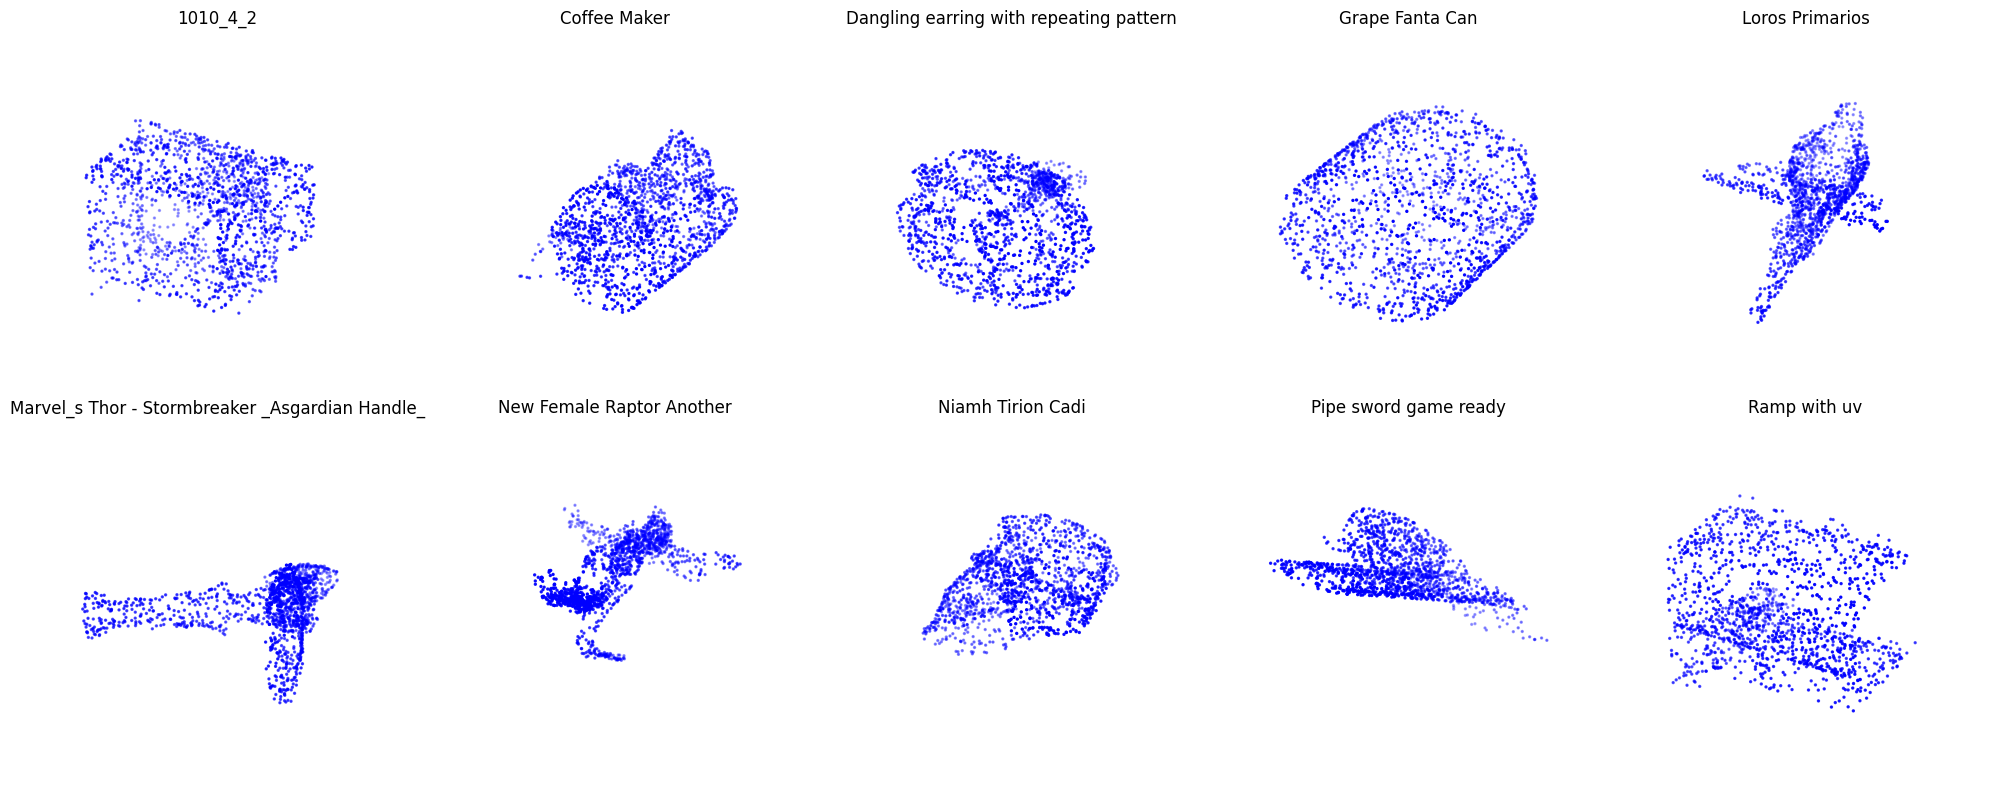

In [ ]:
size = 10
rows = 2
cols = 5

fig = plt.figure(figsize=(20, 8))

for i, (points, label) in enumerate(zip(point_clouds[:size], labels[:size])):
    ax = fig.add_subplot(rows, cols, i+1, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], s=2, c='b', depthshade=True)
    ax.set_title(label)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

## Load the ULIP-2 pre-trained PointBert as $f_{pe}$

In [8]:
%pip install -r ULIP/requirements.txt

  Using cached easydict-1.9.tar.gz (6.4 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached timm-0.4.12-py3-none-any.whl.metadata (30 kB)
  Using cached ftfy-6.0.1.tar.gz (63 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyyaml_env_tag-0.1-py3-none-any.whl.metadata (4.1 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements 

In [8]:
%pip install numpy==1.25.2

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ----- ---------------------------------- 2.1/15.6 MB 11.8 MB/s eta 0:00:02
   ----------- ---------------------------- 4.5/15.6 MB 11.7 MB/s eta 0:00:01
   ------------------ --------------------- 7.1/15.6 MB 11.8 MB/s eta 0:00:01
   ------------------------ --------------- 9.4/15.6 MB 11.7 MB/s eta 0:00:01
   ------------------------------ --------- 11.8/15.6 MB 11.9 MB/s eta 0:00:01
   ------------------------------------- -- 14.4/15.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 15.6/15.6 MB 11.5 MB/s  0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.9.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.


In [7]:
import os
import sys
import open3d as o3d
from argparse import Namespace
import torch

sys.path.append(os.path.join(os.getcwd(), "ULIP"))
from ULIP.models.ULIP_models import ULIP2_PointBERT_Colored

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


c:\Users\amine\miniconda3\envs\pointllm\lib\site-packages\wandb\apis\public.py:2997: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [8]:
args = Namespace()
args.evaluate_3d = True  

In [9]:
model = ULIP2_PointBERT_Colored(args)
model.eval()

Get openclip model:


open_clip_pytorch_model.bin:   0%|          | 0.00/10.2G [00:00<?, ?B/s]

c:\Users\amine\miniconda3\envs\pointllm\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\amine\.cache\huggingface\hub\models--laion--CLIP-ViT-bigG-14-laion2B-39B-b160k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Finished loading the openclip model.
training from scratch for pointbert.
model size:
32.50M


ULIP2_WITH_OPENCLIP(
  (open_clip_model): CLIP(
    (visual): VisionTransformer(
      (conv1): Conv2d(3, 1664, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (patch_dropout): Identity()
      (ln_pre): LayerNorm((1664,), eps=1e-05, elementwise_affine=True)
      (transformer): Transformer(
        (resblocks): ModuleList(
          (0-47): 48 x ResidualAttentionBlock(
            (ln_1): LayerNorm((1664,), eps=1e-05, elementwise_affine=True)
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=1664, out_features=1664, bias=True)
            )
            (ls_1): Identity()
            (ln_2): LayerNorm((1664,), eps=1e-05, elementwise_affine=True)
            (mlp): Sequential(
              (c_fc): Linear(in_features=1664, out_features=8192, bias=True)
              (gelu): GELU(approximate='none')
              (c_proj): Linear(in_features=8192, out_features=1664, bias=True)
            )
            (ls_2): Identity(

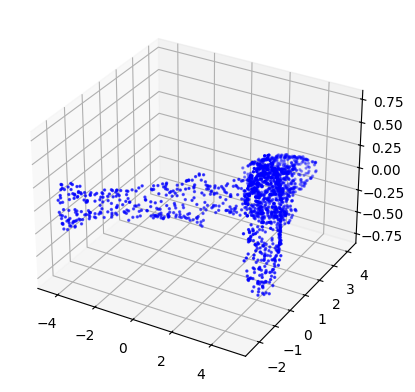

torch.Size([1, 1500, 6])

In [10]:
points = point_clouds[5] 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2], s=2, c='b', depthshade=True)

plt.show()

points = torch.tensor(points, dtype=torch.float32) 
colors = torch.zeros(points.shape, dtype=torch.float32)  

pc_xyzrgb = torch.cat([points, colors], dim=1)  # Nx6
pc_xyzrgb = pc_xyzrgb.unsqueeze(0)  # 1 x 1500 x 6

pc_xyzrgb.shape

In [11]:
with torch.no_grad():
    embeddings = model.point_encoder(pc_xyzrgb)  # 1 x 1500 x 768

embeddings.shape

torch.Size([1, 768])

## Projection Layer $f_{proj}$

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class ProjectionLayer(nn.Module):
    def __init__(self, input_dim: int = 768, hidden_dim: int = 256, output_dim: int = 5120):
        """
        Parameters
        ----------
        input_dim: int
            Embedding dimension of the point cloud encoder (768 for PointBERT)
        hidden_dim: int
            Hidden dimension for projection MLP
        output_dim: int
            Output dimension matching the LLM embedding size
        """
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.GELU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Parameters
        ----------
        x: torch.Tensor
            Input point cloud embeddings, shape (B, input_dim)

        Returns
        -------
        torch.Tensor
            Projected embeddings, shape (B, output_dim)
        """
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x


In [14]:
projection = ProjectionLayer(input_dim=768, hidden_dim=256, output_dim=4096)  # example LLM dim
with torch.no_grad():
    projected_embeddings = projection(embeddings)  # [B, N_points, LLM_emb_dim]
projected_embeddings.shape

torch.Size([1, 4096])

## LLM Backbone $f_{llm}$

In [15]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,
    llm_int8_enable_fp32_cpu_offload=True
)

In [ ]:
def run_pointcloud(model_name, pointcloud, point_encoder):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        torch_dtype=torch.float16,
        device_map="auto",
    )

    pts = torch.tensor(pointcloud, dtype=torch.float32).unsqueeze(0).cuda()
    cols = torch.zeros_like(pts)
    pc = torch.cat([pts, cols], dim=-1)

    point_encoder = point_encoder.cuda()
    with torch.no_grad():
        emb = point_encoder.point_encoder(pc)  

    llm_emb_dim = model.get_input_embeddings().weight.shape[1]
    proj = ProjectionLayer(emb.shape[-1], 256, llm_emb_dim).cuda()
    with torch.no_grad():
        projected = proj(emb)  

    input_prompt = "Describe this 3D object:"
    inputs = tokenizer(input_prompt, return_tensors="pt").to("cuda")
    input_embeds = model.get_input_embeddings()(inputs.input_ids)
    inputs_embeds = torch.cat([projected, input_embeds], dim=1)

    # Generate
    outputs = model.generate(inputs_embeds=inputs_embeds, max_new_tokens=100)
    text_out = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    return text_out[0]

In [18]:
models = [
    "meta-llama/Llama-3.2-3B-Instruct",
    "ministral/Ministral-3b-instruct",
    "Qwen/Qwen2.5-3B",
]

# Example usage in notebook
pc = point_clouds[5]
model_name=models[2]
print(f"Running point cloud inference on {model_name}...")
output = run_pointcloud(model_name, pc, model)
print(f"Output from {model_name}:\n{output}\n")

Running point cloud inference on Qwen/Qwen2.5-3B...


`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
